# S9
This is a iPython Notebook document, associated to the S9 figure in the Support Information of the manuscript:
# PALMA, an improved algorithm for the DOSY signal processing
Afef cherni, Émilie chouzenoux, Marc-André Delsuc 

,Algorithm/Noise level,$10^{-4}$
0,ITAMeD,29.047436
1,ITAMed with $\ell_p$,36.692028
2,TRAIn,26.533095
3,PALMA with $\lambda=0.01$,41.695905
4,PALMA with $\lambda=0.05$,48.289728


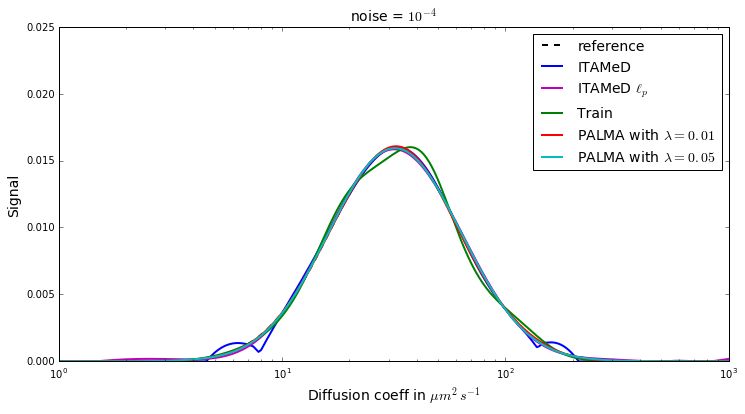

In [1]:
##############################
# Import bib
##############################
import numpy as np
import matplotlib.pylab as plt
import matplotlib.mlab as mlab
%matplotlib inline
import time
import scipy
import pandas as pd
############################## noise = 10^-4
# Original data 
Lap_axis_Gauss = open("Lap_axis_Gauss_64_4.txt", "r")
Lap_axis_Gauss = np.loadtxt(Lap_axis_Gauss)
x_Gauss_64_4 = open("x_Gauss_64_4.txt", "r")
x_Gauss_64_4 = np.loadtxt(x_Gauss_64_4)
# ITAMeD rslt
xrec_Gauss_64_4_ITAMeD = open("xrec_Gauss_64_4_ITAMeD.txt", "r")
xrec_Gauss_64_4_ITAMeD = np.loadtxt(xrec_Gauss_64_4_ITAMeD)
e_Gauss_64_4_ITAMeD = -20*np.log10(np.linalg.norm(xrec_Gauss_64_4_ITAMeD - x_Gauss_64_4) / np.linalg.norm(x_Gauss_64_4))
# ITAMeD with Lp
xrec_Gauss_64_4_ITAMeD_p = open("xrec_Gauss_64_4_ITAMeD_p.txt", "r")
xrec_Gauss_64_4_ITAMeD_p = np.loadtxt(xrec_Gauss_64_4_ITAMeD_p)
e_Gauss_64_4_ITAMeD_p = -20*np.log10(np.linalg.norm(xrec_Gauss_64_4_ITAMeD_p - x_Gauss_64_4) / np.linalg.norm(x_Gauss_64_4))
# TRAIn rslt
xrec_Gauss_64_4_TRAIn = open("xrec_Gauss_64_4_TRAIn.txt", "r")
xrec_Gauss_64_4_TRAIn = np.loadtxt(xrec_Gauss_64_4_TRAIn)
e_Gauss_64_4_TRAIn = -20*np.log10(np.linalg.norm(xrec_Gauss_64_4_TRAIn - x_Gauss_64_4) / np.linalg.norm(x_Gauss_64_4))
# PALMA rslt 0.01
xrec_Gauss0_01_64_4_PALMA = open("xrec_Gauss0_01_64_4_PALMA.txt", "r")
xrec_Gauss0_01_64_4_PALMA = np.loadtxt(xrec_Gauss0_01_64_4_PALMA)
e_Gauss0_01_64_4_PALMA = -20*np.log10(np.linalg.norm(xrec_Gauss0_01_64_4_PALMA - x_Gauss_64_4) / np.linalg.norm(x_Gauss_64_4))
# PALMA rslt 0.05
xrec_Gauss0_05_64_4_PALMA = open("xrec_Gauss0_05_64_4_PALMA.txt", "r")
xrec_Gauss0_05_64_4_PALMA = np.loadtxt(xrec_Gauss0_05_64_4_PALMA)
e_Gauss0_05_64_4_PALMA = -20*np.log10(np.linalg.norm(xrec_Gauss0_05_64_4_PALMA - x_Gauss_64_4) / np.linalg.norm(x_Gauss_64_4))
# Comparaison
plt.figure(figsize=(12, 6))
plt.semilogx(Lap_axis_Gauss, x_Gauss_64_4, "k--", linewidth = 2, label="reference")
plt.semilogx(Lap_axis_Gauss, xrec_Gauss_64_4_ITAMeD, "b-", linewidth = 2, label="ITAMeD")
plt.semilogx(Lap_axis_Gauss, xrec_Gauss_64_4_ITAMeD_p, "m-", linewidth = 2, label="ITAMeD $\ell_p$")
plt.semilogx(Lap_axis_Gauss, xrec_Gauss_64_4_TRAIn, "g-", linewidth = 2, label="Train")
plt.semilogx(Lap_axis_Gauss, xrec_Gauss0_01_64_4_PALMA, "r-", linewidth = 2, label="PALMA with $\lambda=0.01$")
plt.semilogx(Lap_axis_Gauss, xrec_Gauss0_05_64_4_PALMA, "c-", linewidth = 2, label="PALMA with $\lambda=0.05$")
plt.ylim(ymin=0, ymax=0.025)
#plt.xlim([Lap_axis_Gauss.min(), Lap_axis_Gauss.max()])
plt.title('noise = $10^{-4}$', fontsize=14)
#plt.text(1.5, 4.3, "noise = $10^{-2}$")
plt.xlabel('Diffusion coeff in $\mu m^2 \, s^{-1}$', fontsize=14)
plt.ylabel('Signal', fontsize=14)
plt.legend(fontsize=14)
#plt.savefig('S8', format='eps', dpi=1000)
E_4 =( e_Gauss_64_4_ITAMeD, e_Gauss_64_4_ITAMeD_p, e_Gauss_64_4_TRAIn, e_Gauss0_01_64_4_PALMA, e_Gauss0_05_64_4_PALMA)
tab = pd.DataFrame()
tab["Algorithm/Noise level"]= ("ITAMeD", "ITAMed with $\ell_p$", "TRAIn", "PALMA with $\lambda=0.01$", "PALMA with $\lambda=0.05$")
tab["$10^{-4}$"]  = E_4
tab